<a href="https://colab.research.google.com/github/sushant8525/EV_Market_Segmentation/blob/main/EV_Marketsegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [296]:
data1 = pd.read_csv('EV Chargers Sanctioned.csv')
data1.head(30)

,State/UT,No. of EV Chargers Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,235
8,West Bengal,141
9,Telangana,138


In [297]:
data1 = data1.drop(25)

In [298]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   State/UT                       25 non-null     object
 1   No. of EV Chargers Sanctioned  25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


In [299]:
data10=data1.sort_values('No. of EV Chargers Sanctioned', ascending=False)
data10.head()

,State/UT,No. of EV Chargers Sanctioned
0,Maharashtra,317
2,Tamil Nadu,281
3,Gujarat,278
1,Andhra Pradesh,266
7,Madhya Pradesh,235


In [300]:

import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [301]:

fig = px.bar(data10, x='State/UT', y='No. of EV Chargers Sanctioned')
fig.show()

# conclusion top 3 no. of EV chargers Sanctioned 
maharashtra> tamil nadu >Gujarat >andhra pradesh > madhya pradesh

# EV Charging Facility available

In [302]:
data2 = pd.read_csv('EV Charging Facility available.csv')


In [303]:
data2.head()

,State/UT,No of RO's where EV Charging Facility available
0,Andhra Pradesh,65
1,Arunachal Pradesh,4
2,Assam,19
3,Bihar,26
4,Chandigarh,4


In [304]:
data2.rename(columns = {"No of RO's where EV Charging Facility available":'EV_Charging_Facility_available'}, inplace = True)

In [305]:
data20=data2.sort_values("EV_Charging_Facility_available", ascending=False)
data20.head()

,State/UT,EV_Charging_Facility_available
31,Grand Total,1536
24,Rajasthan,174
16,Madhya Pradesh,167
28,Uttar Pradesh,128
9,Haryana,114


In [306]:
data20 = data20.drop(31)

In [307]:
fig = px.bar(data20, x='State/UT', y="EV_Charging_Facility_available")
fig.show()


# conclusion:- top 5 state which  EV_Charging_Facility_available 
    Rajasthan >madhya pradesh > uttar pradesh >haryana > telangana

# EV SELLS

In [308]:
data3 = pd.read_csv('EV SELLS.csv')


In [309]:
data3.head()

,hoi,State/UT,Total Number of Invoices/Sales
0,1,Jammu Kashmir,1036
1,2,Himachal Pradesh,446
2,3,Punjab,2977
3,4,Chandigarh,154
4,5,Uttarakhand,2288


In [310]:
data3.drop(['hoi'], axis=1,inplace = True)

In [311]:
data3.head()

,State/UT,Total Number of Invoices/Sales
0,Jammu Kashmir,1036
1,Himachal Pradesh,446
2,Punjab,2977
3,Chandigarh,154
4,Uttarakhand,2288


In [312]:
data30=data3.sort_values("Total Number of Invoices/Sales", ascending=False)
data30.head()

,State/UT,Total Number of Invoices/Sales
34,Total,178521
24,Karnataka,33483
28,Tamil Nadu,24632
22,Maharashtra,20955
7,Rajasthan,14326


In [313]:
data30 = data30.drop(34)

In [314]:
data30.head()

,State/UT,Total Number of Invoices/Sales
24,Karnataka,33483
28,Tamil Nadu,24632
22,Maharashtra,20955
7,Rajasthan,14326
6,Delhi,12850


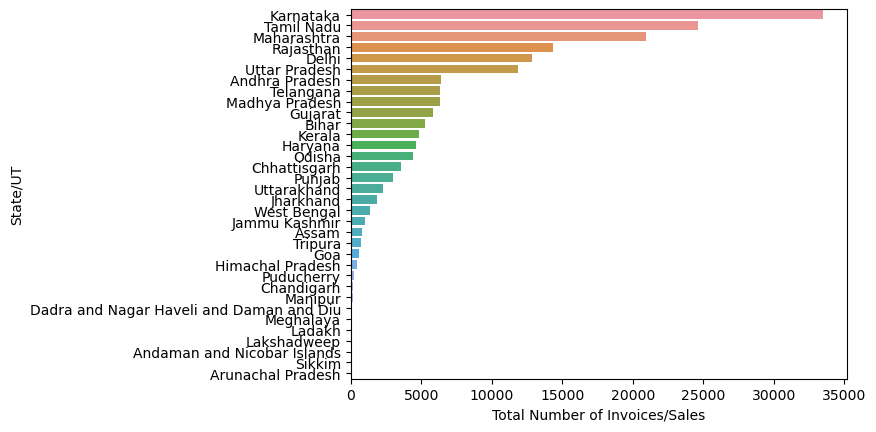

In [315]:
sns.barplot(data=data30, x='Total Number of Invoices/Sales', y='State/UT', order=data30.groupby('State/UT')['Total Number of Invoices/Sales'].mean().sort_values(ascending=False).index)
plt.show()

# top 5 state where high sales of EV 

karnatak

tamil nadu

maharashtra

rajsthan

delhi

# Fuel

In [316]:
data4=pd.read_excel('./Fuel.xlsx',header=[3])
data4.head(10)

C:\Users\HP\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



,Unnamed: 0,Unnamed: 1,2WIC,2WN,2WT,3WN,3WT,4WIC,HGV,HMV,HPV,LGV,LMV,LPV,MGV,MMV,MPV,OTH,Unnamed: 18
0,1,CNG ONLY,0,0,0,"2,072","1,63,223",0,"10,334",3,"1,826","73,442",79,900,"10,285",9,"2,273",1,"2,64,447"
1,2,DIESEL,1,36,0,"3,949","60,454",243,"2,18,157","4,860","7,909","3,83,920","11,36,058","52,771","24,491","8,392","10,952","41,305","19,53,498"
2,3,DIESEL/HYBRID,0,0,0,0,0,0,0,0,0,0,574,1,0,0,0,0,575
3,4,DUAL DIESEL/CNG,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,4
4,5,DUAL DIESEL/LNG,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,6,ELECTRIC(BOV),10,"5,43,918","3,957",250,"3,02,518",8,0,0,"1,780",379,"29,602","3,985",0,0,10,86,"8,86,503"
6,7,ETHANOL,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2
7,8,LNG,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,10
8,9,LPG ONLY,0,0,0,20,"12,931",0,0,0,0,0,0,14,0,0,0,0,"12,965"
9,10,NOT APPLICABLE,0,3,0,9,233,2,724,35,0,"13,160","39,932",6,197,"2,129",0,22,"56,452"


In [317]:
data4.drop(['Unnamed: 0',], axis=1,inplace = True)
data4.rename(columns = {"Unnamed: 18":'Total'}, inplace = True)
data4.rename(columns = {"Unnamed: 1":'Fuel'}, inplace = True)

In [318]:
data4["2WIC"] = [float(str(i).replace(",", "")) for i in data4["2WIC"]]
data4["2WN"] = [float(str(i).replace(",", "")) for i in data4["2WN"]]
data4["2WT"] = [float(str(i).replace(",", "")) for i in data4["2WT"]]
data4["3WN"] = [float(str(i).replace(",", "")) for i in data4["3WN"]]
data4["3WT"] = [float(str(i).replace(",", "")) for i in data4["3WT"]]
data4["4WIC"] = [float(str(i).replace(",", "")) for i in data4["4WIC"]]
data4["HGV"] = [float(str(i).replace(",", "")) for i in data4["HGV"]]
data4["HMV"] = [float(str(i).replace(",", "")) for i in data4["HMV"]]
data4["HPV"] = [float(str(i).replace(",", "")) for i in data4["HPV"]]
data4["LGV"] = [float(str(i).replace(",", "")) for i in data4["LGV"]]
data4["LMV"] = [float(str(i).replace(",", "")) for i in data4["LMV"]]
data4["LPV"] = [float(str(i).replace(",", "")) for i in data4["LPV"]]
data4["MGV"] = [float(str(i).replace(",", "")) for i in data4["MGV"]]
data4["MMV"] = [float(str(i).replace(",", "")) for i in data4["MMV"]]
data4["MPV"] = [float(str(i).replace(",", "")) for i in data4["MPV"]]
data4["OTH"] = [float(str(i).replace(",", "")) for i in data4["OTH"]]
data4["Total"] = [float(str(i).replace(",", "")) for i in data4["Total"]]

In [319]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fuel    14 non-null     object 
 1   2WIC    14 non-null     float64
 2   2WN     14 non-null     float64
 3   2WT     14 non-null     float64
 4   3WN     14 non-null     float64
 5   3WT     14 non-null     float64
 6   4WIC    14 non-null     float64
 7   HGV     14 non-null     float64
 8   HMV     14 non-null     float64
 9   HPV     14 non-null     float64
 10  LGV     14 non-null     float64
 11  LMV     14 non-null     float64
 12  LPV     14 non-null     float64
 13  MGV     14 non-null     float64
 14  MMV     14 non-null     float64
 15  MPV     14 non-null     float64
 16  OTH     14 non-null     float64
 17  Total   14 non-null     float64
dtypes: float64(17), object(1)
memory usage: 2.1+ KB


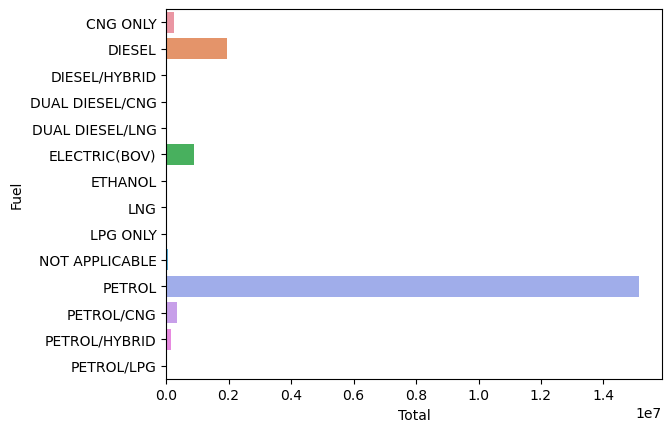

In [320]:
sns.barplot(x=data4['Total'], y=data4['Fuel'])
plt.show()

# mostly use fuel 
petrol , 

diesel then 

electric use in vehicles

# Vehicle Class

In [321]:
data5=pd.read_excel('./Vehicle Class.xlsx',header=[3])
data5.head(10)

C:\Users\HP\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



,Unnamed: 0,Unnamed: 1,CNG ONLY,DIESEL,DIESEL/HYBRID,DI-METHYL ETHER,DUAL DIESEL/BIO CNG,DUAL DIESEL/CNG,DUAL DIESEL/LNG,ELECTRIC(BOV),...,METHANOL,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,Unnamed: 23
0,1,ADAPTED VEHICLE,0,244,0,0,0,0,0,18,...,0,2,"14,441",204,0,65,2,0,0,"14,976"
1,2,AGRICULTURAL TRACTOR,0,"5,76,226",0,0,0,0,0,3,...,0,98,84,0,0,0,0,0,0,"5,76,411"
2,3,AMBULANCE,0,"9,453",0,0,0,0,0,0,...,0,0,"1,778",97,0,4,33,0,0,"11,365"
3,4,ANIMAL AMBULANCE,4,394,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,401
4,5,ARMOURED/SPECIALISED VEHICLE,0,183,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,183
5,6,ARTICULATED VEHICLE,0,"18,199",0,0,0,0,1,0,...,0,45,0,0,0,0,0,0,0,"18,255"
6,7,AUXILIARY TRAILER,0,2,0,0,0,0,0,0,...,0,12,0,0,0,0,0,0,0,14
7,8,BREAKDOWN VAN,0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
8,9,BULLDOZER,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,10,BUS,"3,613","18,916",0,0,0,0,0,"1,788",...,0,0,0,0,0,0,0,0,0,"24,317"


In [322]:
data5.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'CNG ONLY', 'DIESEL', 'DIESEL/HYBRID',
       'DI-METHYL ETHER', 'DUAL DIESEL/BIO CNG', 'DUAL DIESEL/CNG',
       'DUAL DIESEL/LNG', 'ELECTRIC(BOV)', 'ETHANOL', 'FUEL CELL HYDROGEN',
       'LNG', 'LPG ONLY', 'METHANOL', 'NOT APPLICABLE', 'PETROL', 'PETROL/CNG',
       'PETROL/ETHANOL', 'PETROL/HYBRID', 'PETROL/LPG', 'PETROL/METHANOL',
       'SOLAR', 'Unnamed: 23'],
      dtype='object')

In [323]:
# Visual Python: Data Analysis > Subset
data50=data5.loc[:, ['Unnamed: 1','ELECTRIC(BOV)']]
data50.head()

,Unnamed: 1,ELECTRIC(BOV)
0,ADAPTED VEHICLE,18
1,AGRICULTURAL TRACTOR,3
2,AMBULANCE,0
3,ANIMAL AMBULANCE,0
4,ARMOURED/SPECIALISED VEHICLE,0


In [324]:
data50["ELECTRIC(BOV)"] = [float(str(i).replace(",", "")) for i in data50["ELECTRIC(BOV)"]]


In [325]:
data50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 1     70 non-null     object 
 1   ELECTRIC(BOV)  70 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [326]:
data51=data50.sort_values("ELECTRIC(BOV)", ascending=False)
data51.rename(columns = {"Unnamed: 1": "Vehicle_Class"}, inplace = True)
data51["ELECTRIC(BOV)"] = [float(str(i).replace(",", "")) for i in data51["ELECTRIC(BOV)"]]


data51.head()

,Vehicle_Class,ELECTRIC(BOV)
32,M-CYCLE/SCOOTER,505445.0
19,E-RICKSHAW(P),263638.0
40,MOTOR CAR,29567.0
38,MOPED,24252.0
20,E-RICKSHAW WITH CART (G),18860.0


In [327]:
fig = px.bar(data51, x='Vehicle_Class', y="ELECTRIC(BOV)")
fig.show()


# conclusion :- top 5 vehicle_class in Electric 
M-CYCLE/SCOOTER

E-RICKSHAW

MOTOR CAR

MOPED

E-RICKSHAW WITH CART

In [328]:
data6=pd.read_excel('./bhart stages.xlsx',header=[3])
data6.head()

C:\Users\HP\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



,Unnamed: 0,Unnamed: 1,CNG ONLY,DIESEL,DIESEL/HYBRID,DI-METHYL ETHER,DUAL DIESEL/BIO CNG,DUAL DIESEL/CNG,DUAL DIESEL/LNG,ELECTRIC(BOV),...,METHANOL,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,Unnamed: 23
0,1,BHARAT STAGE I,0,36,0,0,0,0,0,0,...,0,0,90,0,0,0,2,0,0,128
1,2,BHARAT STAGE II,0,289,0,0,0,0,0,0,...,0,1,272,1,0,0,0,0,0,563
2,3,BHARAT STAGE III,0,"9,365",0,0,0,0,0,0,...,0,21,957,1,0,1,1,0,0,"10,346"
3,4,BHARAT STAGE III (CEV),1,"19,608",0,0,0,0,0,44,...,0,157,0,0,0,0,0,0,0,"19,810"
4,5,BHARAT STAGE III/IV,0,51,0,0,0,0,0,0,...,0,1,31,1,0,0,0,0,0,84


In [329]:
data6.rename(columns = {"Unnamed: 1": "Stages"}, inplace = True)

In [330]:
data6.rename(columns = {"Unnamed: 23": "Total"}, inplace = True)

In [331]:
data6.drop(['Unnamed: 0'], axis=1,inplace = True)

In [332]:
data6.head()

,Stages,CNG ONLY,DIESEL,DIESEL/HYBRID,DI-METHYL ETHER,DUAL DIESEL/BIO CNG,DUAL DIESEL/CNG,DUAL DIESEL/LNG,ELECTRIC(BOV),ETHANOL,...,METHANOL,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,Total
0,BHARAT STAGE I,0,36,0,0,0,0,0,0,0,...,0,0,90,0,0,0,2,0,0,128
1,BHARAT STAGE II,0,289,0,0,0,0,0,0,0,...,0,1,272,1,0,0,0,0,0,563
2,BHARAT STAGE III,0,"9,365",0,0,0,0,0,0,0,...,0,21,957,1,0,1,1,0,0,"10,346"
3,BHARAT STAGE III (CEV),1,"19,608",0,0,0,0,0,44,0,...,0,157,0,0,0,0,0,0,0,"19,810"
4,BHARAT STAGE III/IV,0,51,0,0,0,0,0,0,0,...,0,1,31,1,0,0,0,0,0,84


In [333]:
data60=data6.loc[:, ['Stages','ELECTRIC(BOV)','Total']]
data60.head()

,Stages,ELECTRIC(BOV),Total
0,BHARAT STAGE I,0,128
1,BHARAT STAGE II,0,563
2,BHARAT STAGE III,0,"10,346"
3,BHARAT STAGE III (CEV),44,"19,810"
4,BHARAT STAGE III/IV,0,84


In [334]:
data60.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Stages         25 non-null     object
 1   ELECTRIC(BOV)  25 non-null     object
 2   Total          25 non-null     object
dtypes: object(3)
memory usage: 728.0+ bytes


In [335]:
data60["ELECTRIC(BOV)"] = [float(str(i).replace(",", "")) for i in data60["ELECTRIC(BOV)"]]
data60["Total"] = [float(str(i).replace(",", "")) for i in data60["Total"]]


In [339]:
data60 = data60.drop(24)

data60.head(25)


,Stages,ELECTRIC(BOV),Total
0,BHARAT STAGE I,0.0,128.0
1,BHARAT STAGE II,0.0,563.0
2,BHARAT STAGE III,0.0,10346.0
3,BHARAT STAGE III (CEV),44.0,19810.0
4,BHARAT STAGE III/IV,0.0,84.0
5,BHARAT STAGE IV,36.0,8537.0
6,BHARAT STAGE IV (CEV),0.0,23918.0
7,BHARAT STAGE IV/VI,0.0,12.0
8,BHARAT STAGE V (CEV),0.0,999.0
9,BHARAT STAGE VI,180.0,17097524.0


In [340]:
data60.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Stages         24 non-null     object 
 1   ELECTRIC(BOV)  24 non-null     float64
 2   Total          24 non-null     float64
dtypes: float64(2), object(1)
memory usage: 704.0+ bytes


In [341]:
data61=data60.sort_values("ELECTRIC(BOV)", ascending=False)


In [342]:
fig = px.bar(data61, x='Stages', y="ELECTRIC(BOV)")
fig.show()

In [344]:
data62=data60.sort_values("Total", ascending=False)
data62.head()

,Stages,ELECTRIC(BOV),Total
9,BHARAT STAGE VI,180.0,17097524.0
11,BHARAT (TREM) STAGE III A,0.0,621879.0
6,BHARAT STAGE IV (CEV),0.0,23918.0
3,BHARAT STAGE III (CEV),44.0,19810.0
2,BHARAT STAGE III,0.0,10346.0


In [345]:
fig = px.bar(data61, x='Stages', y="Total")
fig.show()

# conclusion